# [GARCH Models in Python](http://barnesanalytics.com/garch-models-in-python)

In [5]:
%matplotlib inline

import datetime as dt
import sys

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from arch import arch_model

## Data

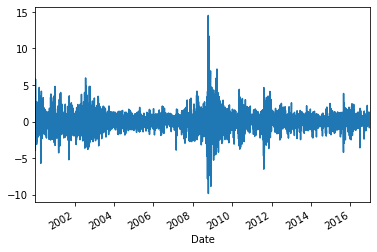

In [3]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2017,1,1)
sp500 = web.get_data_yahoo('SPY', start=start, end=end)
returns = 100 * sp500['Close'].pct_change().dropna()
returns.plot()

In [6]:
model=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6059.30297315224
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6055.653867681939
Iteration:      3,   Func. Count:     24,   Neg. LLF: 6049.988227068225
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6049.654773929788
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6047.498460321631
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6046.603059099833
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6045.846378730749
Iteration:      8,   Func. Count:     59,   Neg. LLF: 6045.369507507028
Iteration:      9,   Func. Count:     65,   Neg. LLF: 6045.264423830888
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6045.2626211873285
Iteration:     11,   Func. Count:     77,   Neg. LLF: 6045.262600835493
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6045.2626003187215
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 

In [8]:
forecasts = results.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

In [9]:
lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')

In [10]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')

-1.3665926411477463


Text(0.5, 1.0, 'Distribution of Returns')